In [1]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
from scipy.stats import sem
from sklearn import metrics
import pandas as pd
target_names = ['non-patient', 'patient']

In [2]:
def CI(y_true, y_pred):
    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))

In [3]:
fivefolds_label = pd.read_csv('../data/biclass2.txt', sep=' ')
fivefolds_label.rename(columns = {'file':'name'}, inplace = True)
fivefolds_label['name'] =  fivefolds_label['name'].str.replace('CTT', '').astype(int)
fivefolds_label['label'] =  fivefolds_label['label'].astype(bool).astype(str)
fivefolds_label['label'] =  fivefolds_label['label'].str.replace('False', 'Non-Dementia')
fivefolds_label['label'] =  fivefolds_label['label'].str.replace('True', 'Dementia')

## whisper

In [4]:
WhisperForAudioClassification_v2_15k = pd.read_csv('whisper-v2-15k-r-a-final-fix.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('\\').str.get(-1)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('C').str.get(0).astype(int)
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.sort_values(by=['name'])
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.reset_index(drop=True)
WhisperForAudioClassification_v2_15k['label'] = fivefolds_label['label']
WhisperForAudioClassification_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,-0.118892,0.0,False,Non-Dementia
1,2,0.207485,0.0,False,Non-Dementia
2,3,0.257787,0.0,False,Non-Dementia
3,4,0.963926,1.5,False,Dementia
4,5,0.691417,1.0,False,Dementia
5,6,0.238683,0.0,False,Non-Dementia
6,7,-0.097454,0.0,False,Non-Dementia
7,8,1.417571,0.0,False,Non-Dementia
8,9,0.900687,6.0,False,Dementia
9,10,0.383882,1.0,False,Dementia


In [5]:
WhisperForAudioClassification_v2_15k.tail(35)

,name,hyps,truth,ifcorrect,label
50,65,1.583495,1.0,False,Dementia
51,67,1.272668,0.5,False,Dementia
52,68,1.446882,0.0,False,Dementia
53,69,0.704826,0.0,False,Non-Dementia
54,70,0.264333,0.0,False,Non-Dementia
55,71,0.651151,0.0,False,Non-Dementia
56,72,0.328696,0.0,False,Non-Dementia
57,73,0.004325,0.0,False,Non-Dementia
58,74,0.263807,0.0,False,Non-Dementia
59,75,-0.227138,0.0,False,Non-Dementia


In [6]:
WhisperForAudioClassification_v2_15k_result = WhisperForAudioClassification_v2_15k['ifcorrect'].tolist()
WhisperForAudioClassification_v2_15k_hyps = WhisperForAudioClassification_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = WhisperForAudioClassification_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = WhisperForAudioClassification_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in WhisperForAudioClassification_v2_15k['hyps'].tolist()]
WhisperForAudioClassification_v2_15k_truth = [float(i) for i in WhisperForAudioClassification_v2_15k['truth'].tolist()]
WhisperForAudioClassification_v2_15k_name = [str(i).replace("CTT", "") for i in WhisperForAudioClassification_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)))
print('r2: ', metrics.r2_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)

evs:  0.21617027814149992
mae:  0.7149750296903007
mse:  1.6052355842034263
rmse:  1.266978920189056
r2:  0.2140529870992609


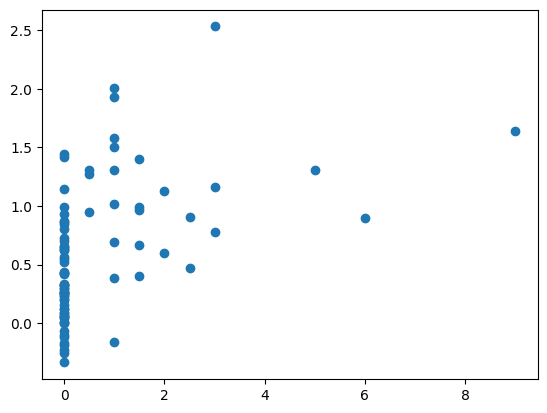

In [9]:
import matplotlib.pyplot as plt
plt.scatter(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)
# plt.plot(list(range(len(fivefolds_1_truth))), fivefolds_1_hyps)
plt.show()

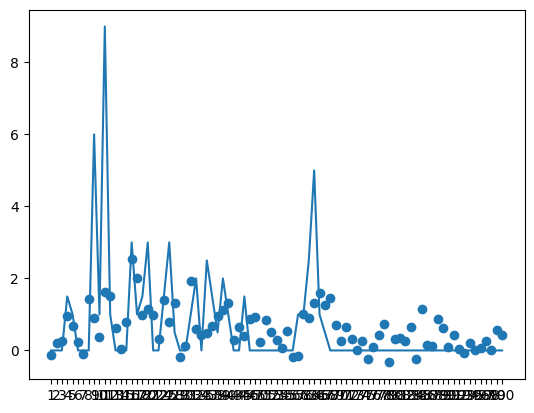

In [10]:
import matplotlib.pyplot as plt
plt.scatter(WhisperForAudioClassification_v2_15k_name, WhisperForAudioClassification_v2_15k_hyps)
plt.plot(WhisperForAudioClassification_v2_15k_name, WhisperForAudioClassification_v2_15k_truth)
plt.show()

<Axes: >

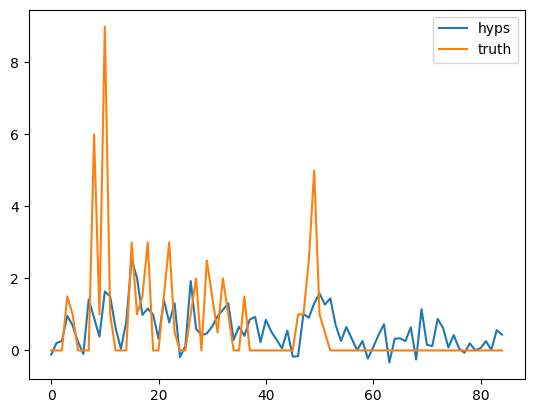

In [11]:
WhisperForAudioClassification_v2_15k_noname = WhisperForAudioClassification_v2_15k
WhisperForAudioClassification_v2_15k_noname = WhisperForAudioClassification_v2_15k_noname.drop(['name'], axis=1)
WhisperForAudioClassification_v2_15k_noname.plot()

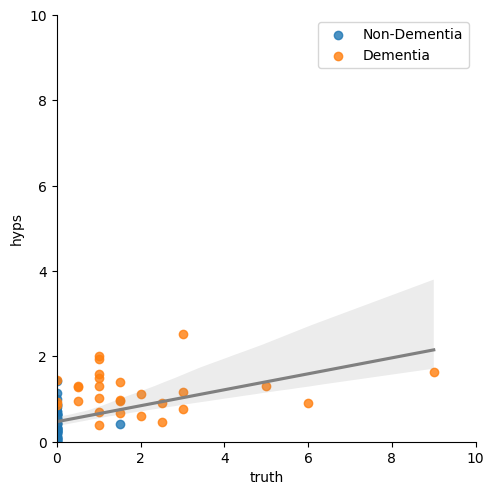

In [12]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WhisperForAudioClassification_v2_15k['truth'],WhisperForAudioClassification_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=WhisperForAudioClassification_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# save the plot as PNG file
plt.savefig("CDRSOB_v2.png")
plt.savefig("CDRSOB_v2.jpg")

<Axes: xlabel='truth', ylabel='hyps'>

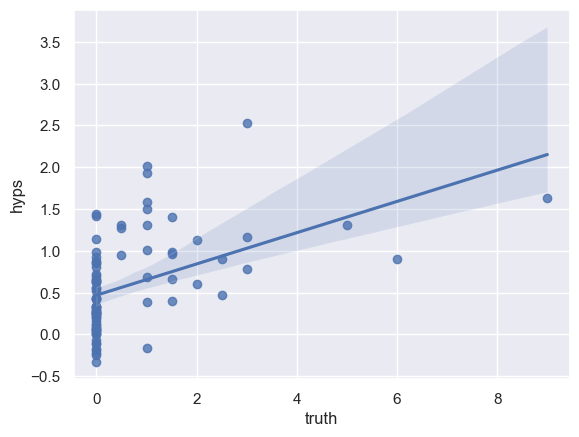

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k)

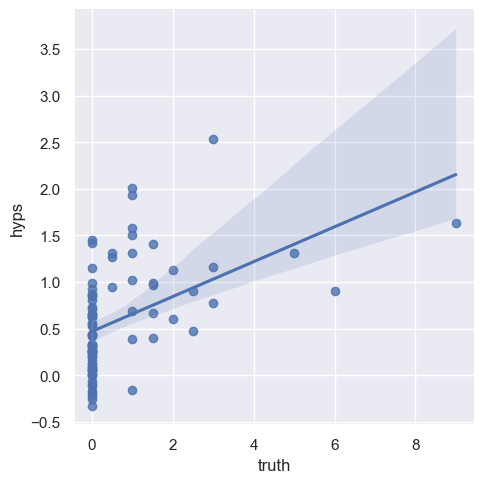

In [14]:
sns.lmplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k)

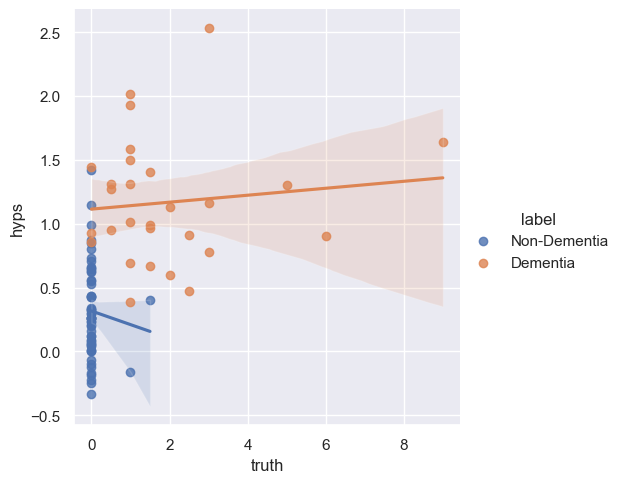

In [15]:
sns.lmplot(x="truth", y="hyps", hue="label", data=WhisperForAudioClassification_v2_15k)

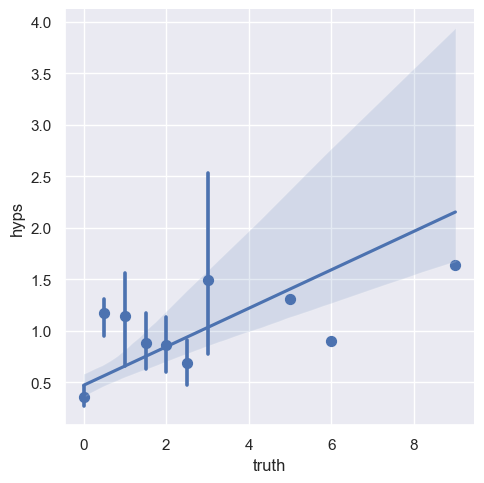

In [16]:
sns.lmplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, x_estimator=np.mean);

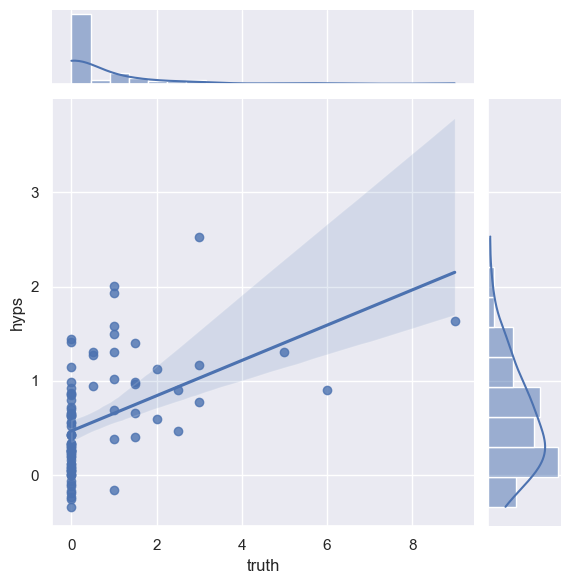

In [17]:
sns.jointplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, kind="reg")

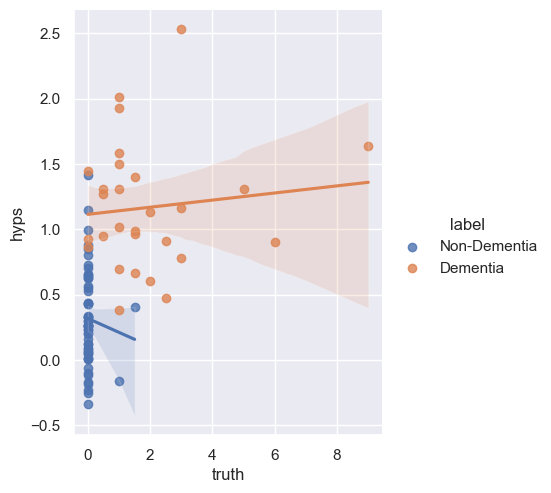

In [18]:
sns.pairplot(WhisperForAudioClassification_v2_15k, x_vars="truth", y_vars="hyps", hue="label", height=5, aspect=.8, kind="reg")

In [19]:
# decision_tree_result = pd.DataFrame()
train_mae = []
test_mae = []

fivefolds1_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k1.csv')
fivefolds1_hyps = fivefolds1_steps['hyps'].tolist()
fivefolds1_truth = [int(i) for i in fivefolds1_steps['truth'].tolist()]
fivefolds1_name = [str(i).replace("CTT", "") for i in fivefolds1_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds1_truth, fivefolds1_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps)))
print('r2: ', metrics.r2_score(fivefolds1_truth, fivefolds1_hyps))
test_mae1 = metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps)
test_mae.append(test_mae1)
train_mae1 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds1_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds1_name))
train_mae.append(train_mae1)

fivefolds2_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k2.csv')
fivefolds2_hyps = fivefolds2_steps['hyps'].tolist()
fivefolds2_truth = [int(i) for i in fivefolds2_steps['truth'].tolist()]
fivefolds2_name = [str(i).replace("CTT", "") for i in fivefolds2_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds2_truth, fivefolds2_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps)))
print('r2: ', metrics.r2_score(fivefolds2_truth, fivefolds2_hyps))
test_mae2 = metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps)
test_mae.append(test_mae2)
train_mae2 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds2_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds2_name))
train_mae.append(train_mae2)

fivefolds3_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k3.csv')
fivefolds3_hyps = fivefolds3_steps['hyps'].tolist()
fivefolds3_truth = [int(i) for i in fivefolds3_steps['truth'].tolist()]
fivefolds3_name = [str(i).replace("CTT", "") for i in fivefolds3_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds3_truth, fivefolds3_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps)))
print('r2: ', metrics.r2_score(fivefolds3_truth, fivefolds3_hyps))
test_mae3 = metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps)
test_mae.append(test_mae3)
train_mae3 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds3_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds3_name))
train_mae.append(train_mae3)

fivefolds4_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k4.csv')
fivefolds4_hyps = fivefolds4_steps['hyps'].tolist()
fivefolds4_truth = [int(i) for i in fivefolds4_steps['truth'].tolist()]
fivefolds4_name = [str(i).replace("CTT", "") for i in fivefolds4_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds4_truth, fivefolds4_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps)))
print('r2: ', metrics.r2_score(fivefolds4_truth, fivefolds4_hyps))
test_mae4 = metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps)
test_mae.append(test_mae4)
train_mae4 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds4_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds4_name))
train_mae.append(train_mae4)

fivefolds5_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k5.csv')
fivefolds5_hyps = fivefolds5_steps['hyps'].tolist()
fivefolds5_truth = [int(i) for i in fivefolds5_steps['truth'].tolist()]
fivefolds5_name = [str(i).replace("CTT", "") for i in fivefolds5_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds5_truth, fivefolds5_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps)))
print('r2: ', metrics.r2_score(fivefolds5_truth, fivefolds5_hyps))
test_mae5 = metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps)
test_mae.append(test_mae5)
train_mae5 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds5_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds5_name))
train_mae.append(train_mae5)

array = np.stack((train_mae, test_mae), axis=1)
decision_tree_result = pd.DataFrame(array,  columns = ['train_mae', 'test_mae'])
# decision_tree_result = pd.DataFrame(test_mae,  columns = ['test_mae'])
decision_tree_result

evs:  0.22150013722404893
mae:  0.9255414919720756
mse:  3.048937714193284
rmse:  1.7461207616294139
r2:  0.19028211524702965
evs:  0.08612125950743521
mae:  0.9784858201940855
mse:  4.573362298741297
rmse:  2.138542096555805
r2:  -0.017000264098957052
evs:  0.28929479522553925
mae:  0.4589792358524659
mse:  0.6122666823001166
rmse:  0.7824747167162123
r2:  0.14930254238108787
evs:  0.18951716541342833
mae:  0.60058841112015
mse:  1.7485847000638977
rmse:  1.3223406142382141
r2:  0.17157216669103847
evs:  0.3189961874256765
mae:  0.5291733242133084
mse:  0.9748249787718549
rmse:  0.9873322534850438
r2:  0.31620286683236387


,train_mae,test_mae
0,0.658405,0.925541
1,0.658405,0.978486
2,0.662333,0.458979
3,0.662333,0.600588
4,0.662333,0.529173


In [20]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.0, 0.3)
        plt.bar(X_axis-0.2, train_data, 0.4, color='steelblue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='lightsteelblue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

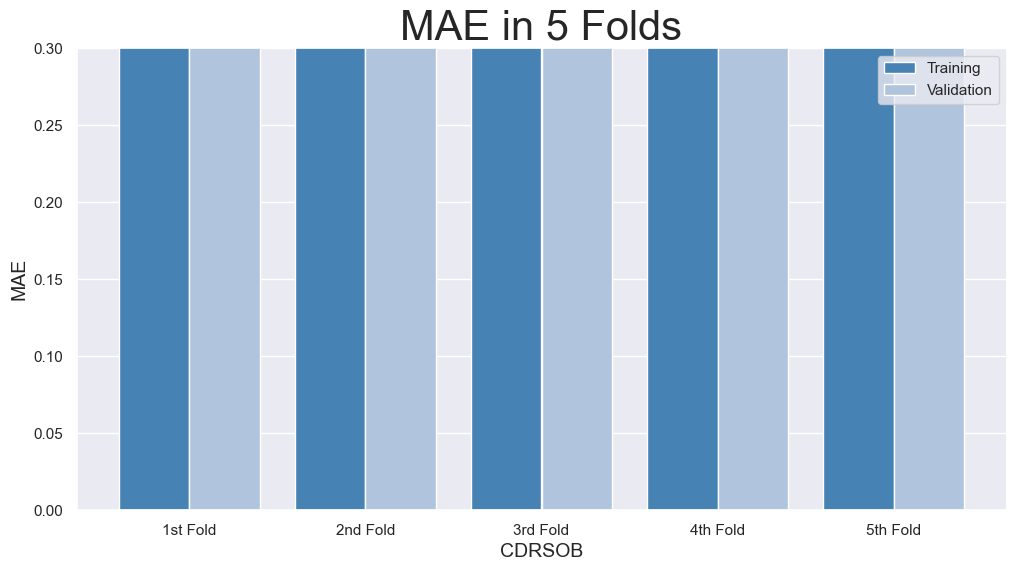

In [21]:
model_name = "CDRSOB"
plot_result(model_name,
            "MAE",
            "MAE in 5 Folds",
            decision_tree_result["train_mae"],
            decision_tree_result["test_mae"])

## BERT

In [4]:
bert_v2_15k = pd.read_csv('bert-v2-15k-r-final-2.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('\\').str.get(-1)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('C').str.get(0).astype(int)
bert_v2_15k['name'] =  bert_v2_15k['name'].astype(int)
bert_v2_15k = bert_v2_15k.sort_values(by=['name'])
bert_v2_15k = bert_v2_15k.reset_index(drop=True)
bert_v2_15k['label'] = fivefolds_label['label']
bert_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,-0.174171,0.0,False,Non-Dementia
1,2,-0.007448,0.0,False,Non-Dementia
2,3,-0.263128,0.0,False,Non-Dementia
3,4,1.470969,1.5,False,Dementia
4,5,0.503959,1.0,False,Dementia
5,6,0.433320,0.0,False,Non-Dementia
6,7,-0.136818,0.0,False,Non-Dementia
7,8,0.929955,0.0,False,Non-Dementia
8,9,0.599958,6.0,False,Dementia
9,10,0.591493,1.0,False,Dementia


In [5]:
bert_v2_15k.tail(35)

,name,hyps,truth,ifcorrect,label
50,65,0.916483,1.0,False,Dementia
51,67,0.742705,0.5,False,Dementia
52,68,0.905827,0.0,False,Dementia
53,69,-0.099035,0.0,False,Non-Dementia
54,70,-0.289059,0.0,False,Non-Dementia
55,71,0.270405,0.0,False,Non-Dementia
56,72,-0.018155,0.0,False,Non-Dementia
57,73,0.234786,0.0,False,Non-Dementia
58,74,0.107381,0.0,False,Non-Dementia
59,75,-0.291952,0.0,False,Non-Dementia


In [6]:
bert_v2_15k_result = bert_v2_15k['ifcorrect'].tolist()
bert_v2_15k_hyps = bert_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = bert_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = bert_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in bert_v2_15k['hyps'].tolist()]
bert_v2_15k_truth = [float(i) for i in bert_v2_15k['truth'].tolist()]
bert_v2_15k_name = [str(i).replace("CTT", "") for i in bert_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(bert_v2_15k_truth, bert_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(bert_v2_15k_truth, bert_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(bert_v2_15k_truth, bert_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(bert_v2_15k_truth, bert_v2_15k_hyps)))
print('r2: ', metrics.r2_score(bert_v2_15k_truth, bert_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(bert_v2_15k_truth, bert_v2_15k_hyps)

evs:  0.011220692509814056
mae:  0.7605763813590303
mse:  2.1008559568411895
rmse:  1.449432977698931
r2:  -0.028610055784067834


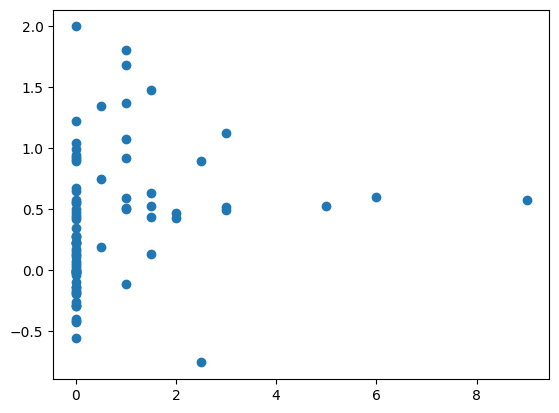

In [9]:
import matplotlib.pyplot as plt
plt.scatter(bert_v2_15k_truth, bert_v2_15k_hyps)
# plt.plot(list(range(len(fivefolds_1_truth))), fivefolds_1_hyps)
plt.show()

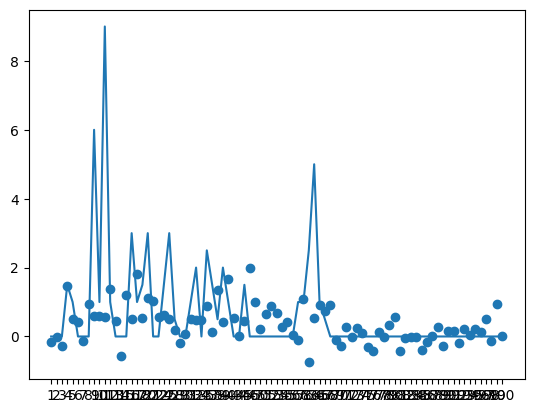

In [10]:
import matplotlib.pyplot as plt
plt.scatter(bert_v2_15k_name, bert_v2_15k_hyps)
plt.plot(bert_v2_15k_name, bert_v2_15k_truth)
plt.show()

<Axes: >

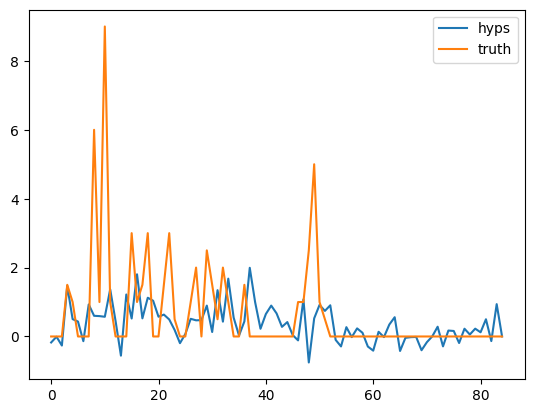

In [11]:
bert_v2_15k_noname = bert_v2_15k
bert_v2_15k_noname = bert_v2_15k_noname.drop(['name'], axis=1)
bert_v2_15k_noname.plot()

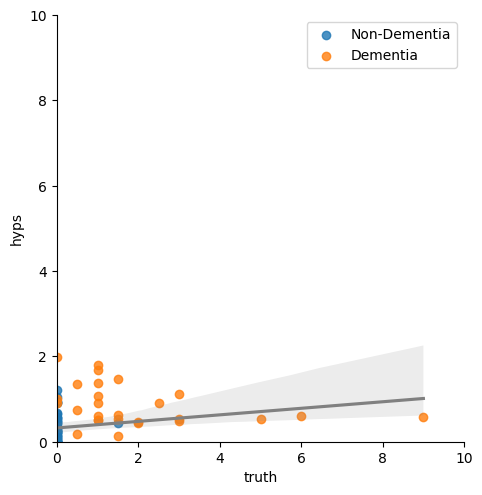

In [12]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(bert_v2_15k['truth'],bert_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=bert_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=bert_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=bert_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# save the plot as PNG file
plt.savefig("CDRSOB_v2_bert.png")
plt.savefig("CDRSOB_v2_bert.jpg")

<Axes: xlabel='truth', ylabel='hyps'>

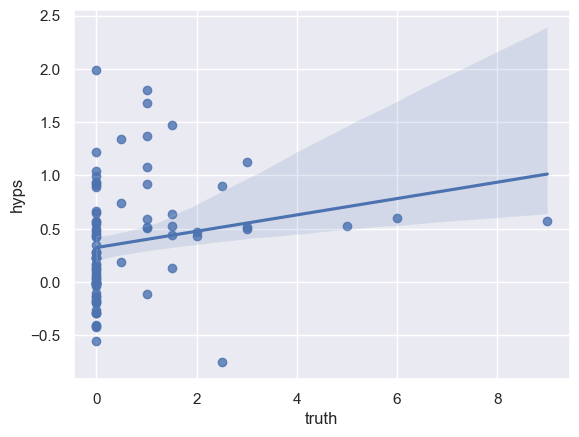

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="truth", y="hyps", data=bert_v2_15k)

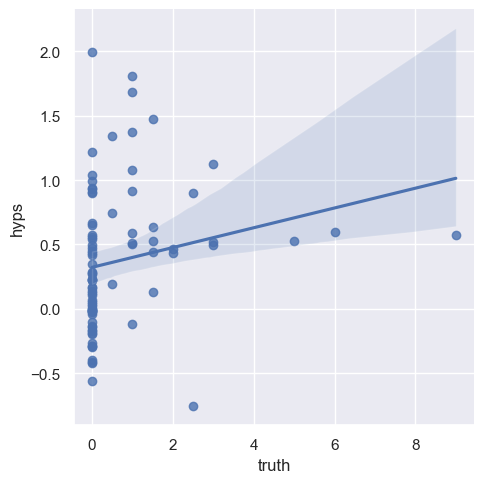

In [14]:
sns.lmplot(x="truth", y="hyps", data=bert_v2_15k)

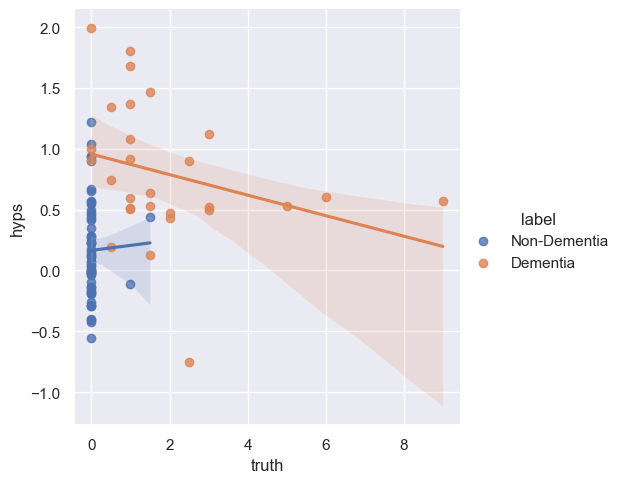

In [15]:
sns.lmplot(x="truth", y="hyps", hue="label", data=bert_v2_15k)

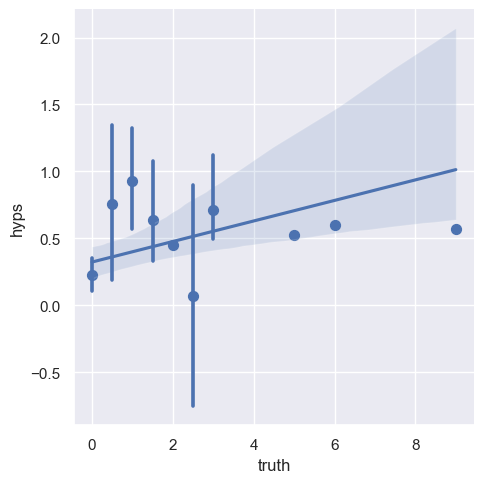

In [16]:
sns.lmplot(x="truth", y="hyps", data=bert_v2_15k, x_estimator=np.mean);

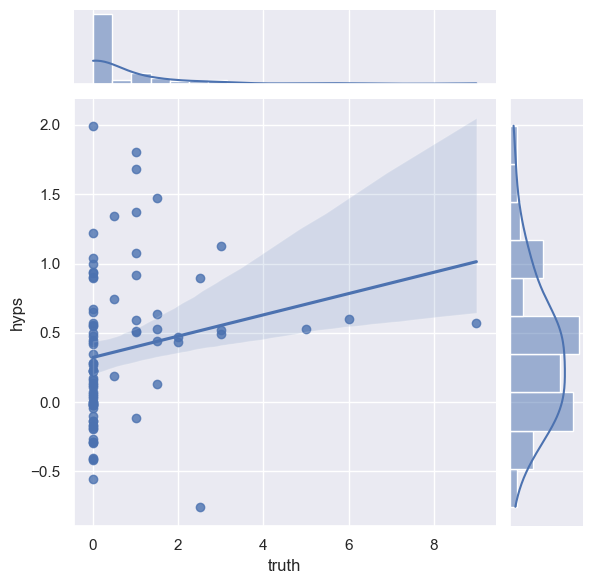

In [17]:
sns.jointplot(x="truth", y="hyps", data=bert_v2_15k, kind="reg")

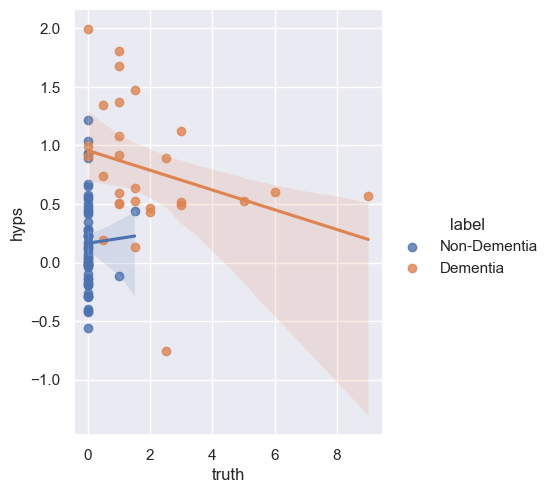

In [18]:
sns.pairplot(bert_v2_15k, x_vars="truth", y_vars="hyps", hue="label", height=5, aspect=.8, kind="reg")

In [19]:
# decision_tree_result = pd.DataFrame()
train_mae = []
test_mae = []

fivefolds1_steps = pd.read_csv('bert-v2-15k1.csv')
fivefolds1_hyps = fivefolds1_steps['hyps'].tolist()
fivefolds1_truth = [int(i) for i in fivefolds1_steps['truth'].tolist()]
fivefolds1_name = [str(i).replace("CTT", "") for i in fivefolds1_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds1_truth, fivefolds1_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps)))
print('r2: ', metrics.r2_score(fivefolds1_truth, fivefolds1_hyps))
test_mae1 = metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps)
test_mae.append(test_mae1)
train_mae1 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds1_name)) / (len(bert_v2_15k_name) - len(fivefolds1_name))
train_mae.append(train_mae1)

fivefolds2_steps = pd.read_csv('bert-v2-15k2.csv')
fivefolds2_hyps = fivefolds2_steps['hyps'].tolist()
fivefolds2_truth = [int(i) for i in fivefolds2_steps['truth'].tolist()]
fivefolds2_name = [str(i).replace("CTT", "") for i in fivefolds2_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds2_truth, fivefolds2_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps)))
print('r2: ', metrics.r2_score(fivefolds2_truth, fivefolds2_hyps))
test_mae2 = metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps)
test_mae.append(test_mae2)
train_mae2 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds2_name)) / (len(bert_v2_15k_name) - len(fivefolds2_name))
train_mae.append(train_mae2)

fivefolds3_steps = pd.read_csv('bert-v2-15k3.csv')
fivefolds3_hyps = fivefolds3_steps['hyps'].tolist()
fivefolds3_truth = [int(i) for i in fivefolds3_steps['truth'].tolist()]
fivefolds3_name = [str(i).replace("CTT", "") for i in fivefolds3_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds3_truth, fivefolds3_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps)))
print('r2: ', metrics.r2_score(fivefolds3_truth, fivefolds3_hyps))
test_mae3 = metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps)
test_mae.append(test_mae3)
train_mae3 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds3_name)) / (len(bert_v2_15k_name) - len(fivefolds3_name))
train_mae.append(train_mae3)

fivefolds4_steps = pd.read_csv('bert-v2-15k4.csv')
fivefolds4_hyps = fivefolds4_steps['hyps'].tolist()
fivefolds4_truth = [int(i) for i in fivefolds4_steps['truth'].tolist()]
fivefolds4_name = [str(i).replace("CTT", "") for i in fivefolds4_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds4_truth, fivefolds4_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps)))
print('r2: ', metrics.r2_score(fivefolds4_truth, fivefolds4_hyps))
test_mae4 = metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps)
test_mae.append(test_mae4)
train_mae4 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds4_name)) / (len(bert_v2_15k_name) - len(fivefolds4_name))
train_mae.append(train_mae4)

fivefolds5_steps = pd.read_csv('bert-v2-15k5.csv')
fivefolds5_hyps = fivefolds5_steps['hyps'].tolist()
fivefolds5_truth = [int(i) for i in fivefolds5_steps['truth'].tolist()]
fivefolds5_name = [str(i).replace("CTT", "") for i in fivefolds5_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds5_truth, fivefolds5_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps)))
print('r2: ', metrics.r2_score(fivefolds5_truth, fivefolds5_hyps))
test_mae5 = metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps)
test_mae.append(test_mae5)
train_mae5 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds5_name)) / (len(bert_v2_15k_name) - len(fivefolds5_name))
train_mae.append(train_mae5)

array = np.stack((train_mae, test_mae), axis=1)
decision_tree_result = pd.DataFrame(array,  columns = ['train_mae', 'test_mae'])
# decision_tree_result = pd.DataFrame(test_mae,  columns = ['test_mae'])
decision_tree_result

evs:  0.08845437127702738
mae:  1.0997637510299683
mse:  3.445674221763724
rmse:  1.8562527364999961
r2:  0.08491930503979794
evs:  0.30535619824745186
mae:  0.9778017219569948
mse:  3.1500631120334344
rmse:  1.7748417146420226
r2:  0.2995055262190577
evs:  0.1453899578386726
mae:  0.5896580885438358
mse:  0.6161012182798391
rmse:  0.7849211541803668
r2:  0.14397474960156964
evs:  0.4684012987405263
mae:  0.5382855731774779
mse:  1.1761560807220466
rmse:  1.084507298602479
r2:  0.4427719551988991
evs:  0.11616215907874239
mae:  0.705409891465131
mse:  1.2968443570226238
rmse:  1.1387907432986202
r2:  0.09032034179723714


,train_mae,test_mae
0,0.669451,1.099764
1,0.669451,0.977802
2,0.675780,0.589658
3,0.675780,0.538286
4,0.675780,0.705410


In [20]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.0, 0.3)
        plt.bar(X_axis-0.2, train_data, 0.4, color='steelblue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='lightsteelblue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

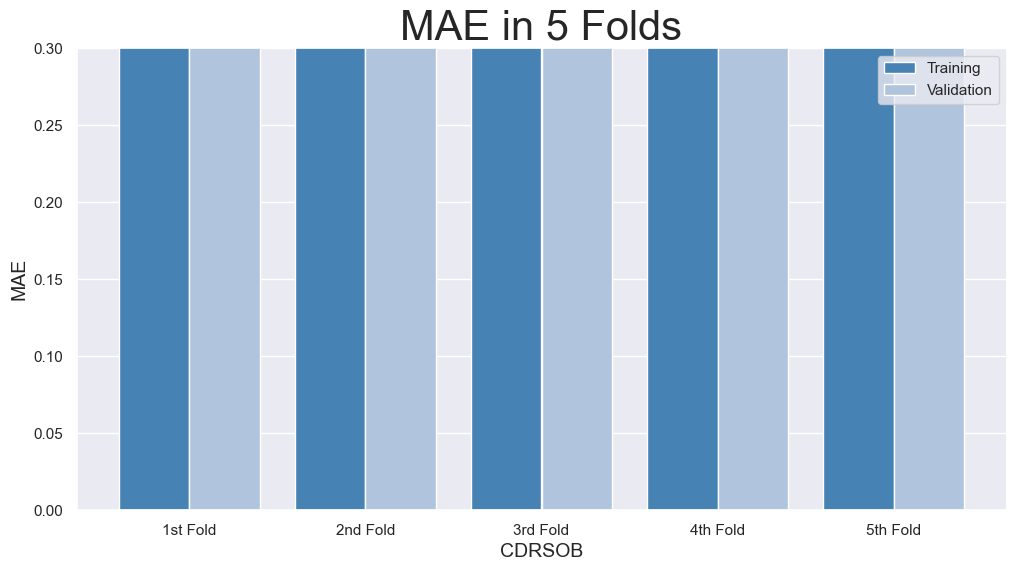

In [21]:
model_name = "CDRSOB"
plot_result(model_name,
            "MAE",
            "MAE in 5 Folds",
            decision_tree_result["train_mae"],
            decision_tree_result["test_mae"])

## Combine

In [4]:
whisper_v2_15k = pd.read_csv('whisper-v2-15k-r-a-final-fix.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-r-final-2.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('\\').str.get(-1)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('C').str.get(0).astype(int)
combine_v2_15k = pd.DataFrame()
bert_v2_15k['name'] =  bert_v2_15k['name'].astype(int)
bert_v2_15k = bert_v2_15k.sort_values(by=['name'])
bert_v2_15k = bert_v2_15k.reset_index(drop=True)
whisper_v2_15k['name'] =  whisper_v2_15k['name'].str.split('\\').str.get(-1)
whisper_v2_15k['name'] =  whisper_v2_15k['name'].str.split('C').str.get(0).astype(int)
whisper_v2_15k = whisper_v2_15k.sort_values(by=['name'])
whisper_v2_15k = whisper_v2_15k.reset_index(drop=True)
print(bert_v2_15k)
print(whisper_v2_15k)
combine_v2_15k['name'] = bert_v2_15k['name']
combine_v2_15k['hyps'] =  (bert_v2_15k['hyps']+whisper_v2_15k['hyps'])/2
combine_v2_15k['truth'] = bert_v2_15k['truth']
combine_v2_15k['ifcorrect'] = bert_v2_15k['ifcorrect']
combine_v2_15k['label'] = fivefolds_label['label']
combine_v2_15k.to_csv("combine_v2_15k.csv")
combine_v2_15k.head(50)

    name      hyps  truth  ifcorrect
0      1 -0.174171    0.0      False
1      2 -0.007448    0.0      False
2      3 -0.263128    0.0      False
3      4  1.470969    1.5      False
4      5  0.503959    1.0      False
..   ...       ...    ...        ...
80    96  0.121412    0.0      False
81    97  0.499947    0.0      False
82    98 -0.134060    0.0      False
83    99  0.938741    0.0      False
84   100  0.002467    0.0      False

[85 rows x 4 columns]
    name      hyps  truth  ifcorrect
0      1 -0.118892    0.0      False
1      2  0.207485    0.0      False
2      3  0.257787    0.0      False
3      4  0.963926    1.5      False
4      5  0.691417    1.0      False
..   ...       ...    ...        ...
80    96  0.064815    0.0      False
81    97  0.258845    0.0      False
82    98  0.012380    0.0      False
83    99  0.561594    0.0      False
84   100  0.437306    0.0      False

[85 rows x 4 columns]


,name,hyps,truth,ifcorrect,label
0,1,-0.146532,0.0,False,Non-Dementia
1,2,0.100019,0.0,False,Non-Dementia
2,3,-0.002671,0.0,False,Non-Dementia
3,4,1.217448,1.5,False,Dementia
4,5,0.597688,1.0,False,Dementia
5,6,0.336002,0.0,False,Non-Dementia
6,7,-0.117136,0.0,False,Non-Dementia
7,8,1.173763,0.0,False,Non-Dementia
8,9,0.750322,6.0,False,Dementia
9,10,0.487687,1.0,False,Dementia


# data augmentation

## whisper

In [4]:
WhisperForAudioClassification_v2_15k = pd.read_csv('whisper-v2-15k-r-final-fix.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('\\').str.get(-1)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('C').str.get(0).astype(int)
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.sort_values(by=['name'])
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.reset_index(drop=True)
WhisperForAudioClassification_v2_15k['label'] = fivefolds_label['label']
WhisperForAudioClassification_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,0.152167,0.0,False,Non-Dementia
1,2,0.107190,0.0,False,Non-Dementia
2,3,-0.000141,0.0,False,Non-Dementia
3,4,0.102521,1.5,False,Dementia
4,5,0.352508,1.0,False,Dementia
5,6,0.323815,0.0,False,Non-Dementia
6,7,0.236505,0.0,False,Non-Dementia
7,8,0.270679,0.0,False,Non-Dementia
8,9,0.282803,6.0,False,Dementia
9,10,0.347766,1.0,False,Dementia


In [5]:
WhisperForAudioClassification_v2_15k.tail(35)

,name,hyps,truth,ifcorrect,label
50,65,0.053194,1.0,False,Dementia
51,67,0.452390,0.5,False,Dementia
52,68,0.007508,0.0,False,Dementia
53,69,0.223249,0.0,False,Non-Dementia
54,70,0.181428,0.0,False,Non-Dementia
55,71,0.099991,0.0,False,Non-Dementia
56,72,0.166855,0.0,False,Non-Dementia
57,73,-0.047314,0.0,False,Non-Dementia
58,74,0.046386,0.0,False,Non-Dementia
59,75,0.370712,0.0,False,Non-Dementia


In [6]:
WhisperForAudioClassification_v2_15k_result = WhisperForAudioClassification_v2_15k['ifcorrect'].tolist()
WhisperForAudioClassification_v2_15k_hyps = WhisperForAudioClassification_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = WhisperForAudioClassification_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = WhisperForAudioClassification_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in WhisperForAudioClassification_v2_15k['hyps'].tolist()]
WhisperForAudioClassification_v2_15k_truth = [float(i) for i in WhisperForAudioClassification_v2_15k['truth'].tolist()]
WhisperForAudioClassification_v2_15k_name = [str(i).replace("CTT", "") for i in WhisperForAudioClassification_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)))
print('r2: ', metrics.r2_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)

evs:  0.004557295005677586
mae:  0.7306234639576252
mse:  2.1991960750317263
rmse:  1.4829686696055742
r2:  -0.07675882777787568


(0.0, 10.0)

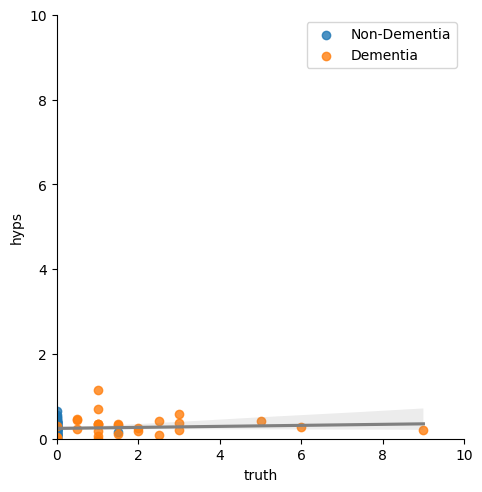

In [9]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WhisperForAudioClassification_v2_15k['truth'],WhisperForAudioClassification_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=WhisperForAudioClassification_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# save the plot as PNG file
# plt.savefig("CDRSOB_v2.png")
# plt.savefig("CDRSOB_v2.jpg")